In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from torchvision import models

from netlens.data import IMAGENET_LABELS
from netlens.image_proc import *
from netlens.occlusion import *

In [25]:
name = 'dog_and_cat.png'
original_img = PIL.Image.open(f'../../images/examples/{name}').convert('RGB')
target_class = 243

== EXAMPLE: OCCLUSION, image dog_and_cat.png (224, 224), class 243: bull mastiff ==


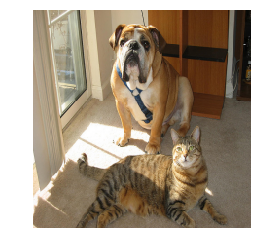

In [26]:
print(f'== EXAMPLE: OCCLUSION, image {name} {original_img.size}, class {target_class}: {IMAGENET_LABELS[target_class]} ==')
show_image(original_img)
prep_img = preprocess_image(original_img)

In [27]:
m_orig = models.vgg19_bn(pretrained=True)
m_orig.eval()

hm, cm, hm_scaled = generate_occlusion_heatmap(m_orig, prep_img, target_class, window=(40,40), verbose=True)
prob_no_occ = torch.max(hm)

36 masks obtained for the input of size torch.Size([3, 224, 224]). First=(0, 40, 0, 40); Last=(200, 224, 200, 224)
Input for the model has shape torch.Size([36, 3, 224, 224])


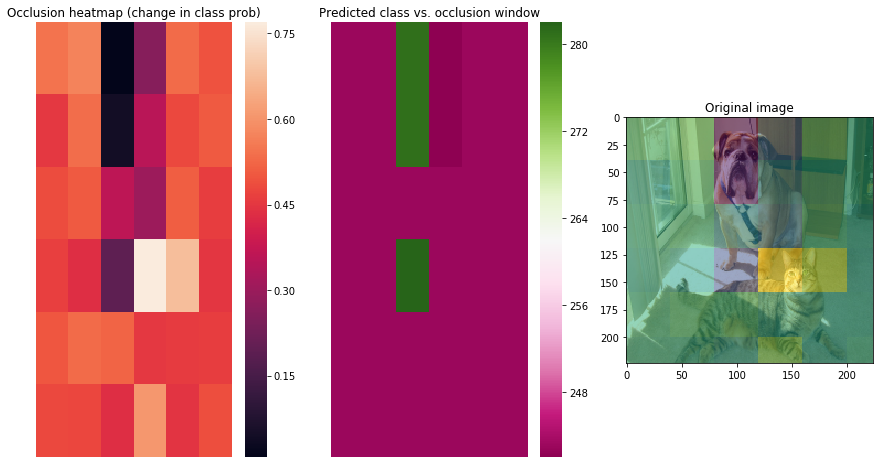

DETECTED CLASSES
242	2	boxer
243	31	bull mastiff
281	2	tabby, tabby cat
282	1	tiger cat


In [28]:
_, axes = plt.subplots(1, 3, figsize=(15, 8))

sns.heatmap(hm, xticklabels=False, yticklabels=False, vmax=prob_no_occ, ax=axes[0])
axes[0].set_title('Occlusion heatmap (change in class prob)')
sns.heatmap(cm, xticklabels=False, yticklabels=False, cmap="PiYG", ax=axes[1])
axes[1].set_title('Predicted class vs. occlusion window')
axes[2].imshow(recreate_image(prep_img))
axes[2].imshow(hm_scaled, alpha=0.50)
axes[2].set_title('Original image')
plt.show()

det_classes, det_counts = torch.unique(cm, return_counts=True)

print('DETECTED CLASSES')
print('\n'.join(f'{int(cl)}\t{cnt}\t{IMAGENET_LABELS[cl]}' for cl, cnt in zip(det_classes.tolist(), det_counts.tolist())))